In [1]:
import sys
sys.path.append('..\\utils')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from MiguelTK import *

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('data/HR_capstone_dataset.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [6]:
df.sample(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
1700,0.38,0.45,2,132,3,0,1,0,sales,medium
8732,0.51,0.72,3,148,2,0,0,0,accounting,medium
3223,0.65,1.00,4,249,3,0,0,0,sales,medium
9494,0.77,0.51,2,254,5,0,0,0,accounting,medium
8401,0.63,0.52,3,183,2,0,0,0,technical,low


In [7]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [9]:
cat_vars = [
    'salary',
    'Department'
]

for var in cat_vars:
    df[var] = pd.Categorical(df[var])

# Contexto

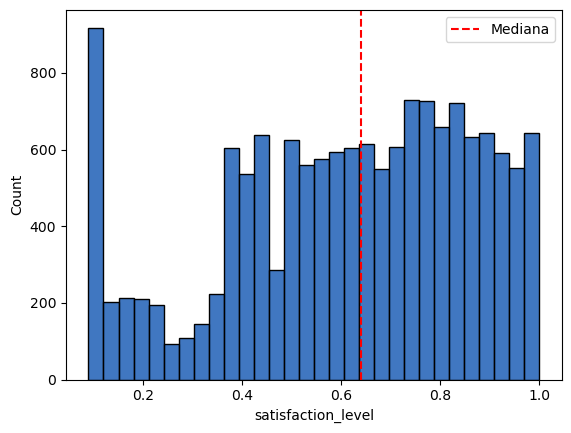

In [10]:
sns.histplot(
    data = df,
    x = 'satisfaction_level',
    color = palette[0]
)
plt.axvline(df['satisfaction_level'].median(),color='red',ls='--',label='Mediana')
plt.legend()

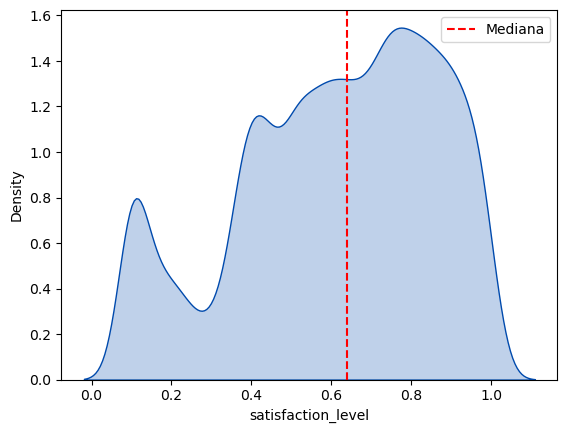

In [11]:
sns.kdeplot(
    data = df,
    x = 'satisfaction_level',
    color = palette[0],
    fill = True
)
plt.axvline(df['satisfaction_level'].median(),color='red',ls='--',label='Mediana')
plt.legend()

In [12]:
df['satisfaction_level'].mean()

0.6128335222348156

<Axes: xlabel='average_montly_hours', ylabel='Count'>

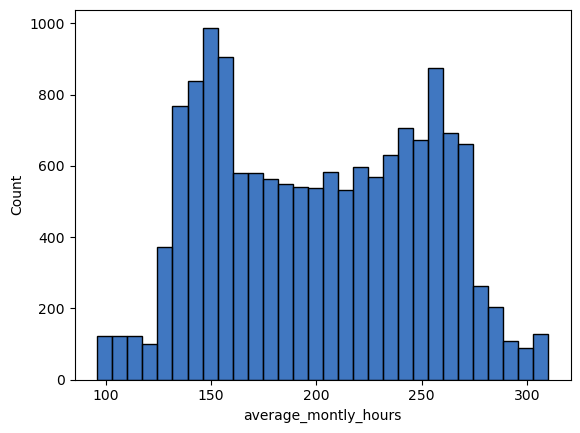

In [13]:
sns.histplot(
    data = df,
    x = 'average_montly_hours',
    color = palette[0]
)

<Axes: xlabel='average_montly_hours', ylabel='Density'>

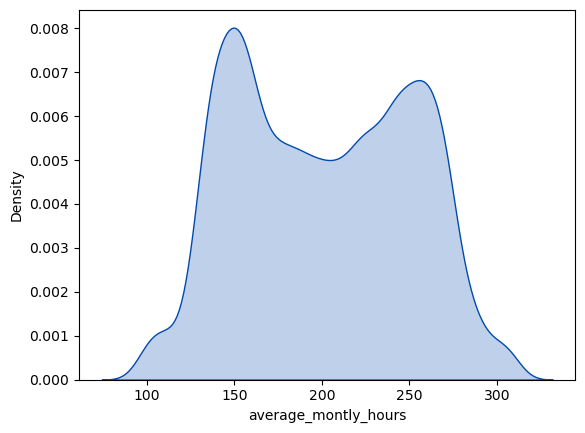

In [14]:
sns.kdeplot(
    data = df,
    x = 'average_montly_hours',
    color = palette[0],
    fill = True
)

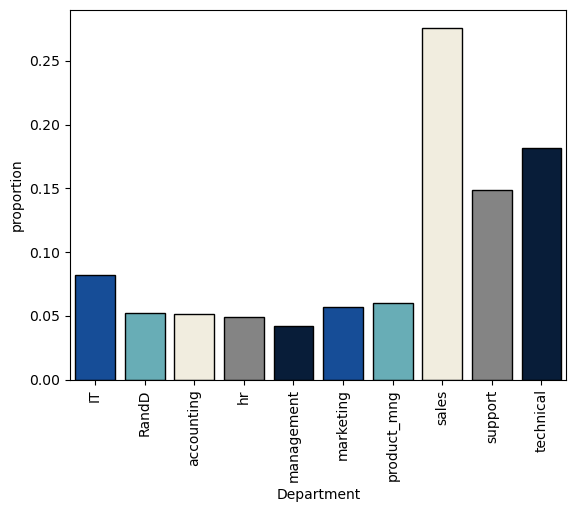

In [60]:
sns.countplot(
    data = df,
    x = 'Department',
    stat = 'proportion',
    **kwargs
)
rot_show()

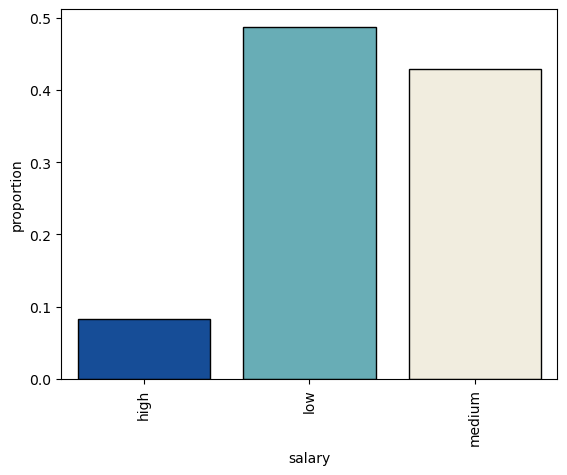

In [61]:
sns.countplot(
    data = df,
    x = 'salary',
    stat = 'proportion',
    **kwargs
)
rot_show()

In [17]:
df['delta'] = df['satisfaction_level'] - df['last_evaluation']

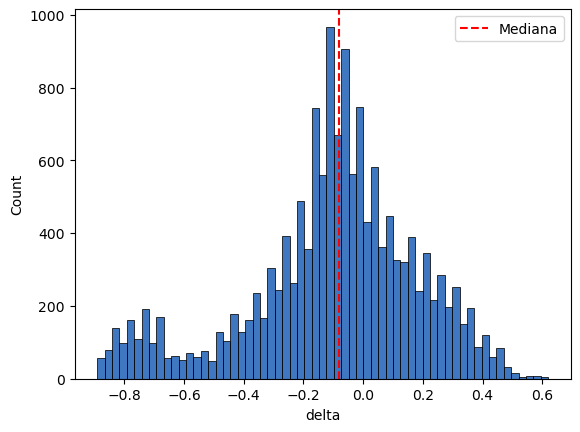

In [18]:
sns.histplot(
    data = df,
    x = 'delta',
    color = palette[0]
)
plt.axvline(df['delta'].median(),color='red',ls='--',label='Mediana')
plt.legend()

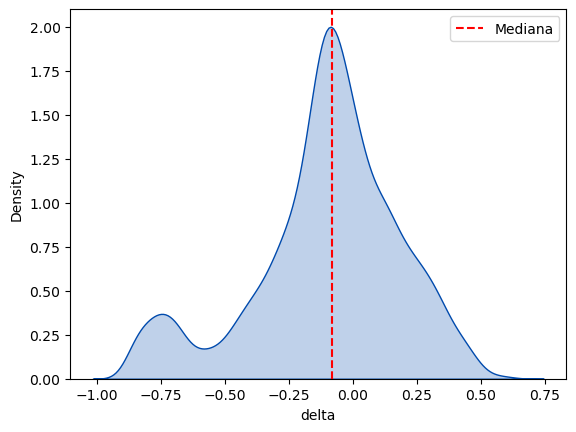

In [19]:
sns.kdeplot(
    data = df,
    x = 'delta',
    color = palette[0],
    fill = True
)
plt.axvline(df['delta'].median(),color='red',ls='--',label='Mediana')
plt.legend()

In [20]:
df['delta'].mean()

-0.10326821788119209

In [21]:
df['left'].value_counts(normalize=True)

left
0    0.761917
1    0.238083
Name: proportion, dtype: float64

## Probabilidad de dejar la compañía 

In [22]:
variables = [
    'Department',
    'salary',
    'Work_accident',
    'promotion_last_5years'
]

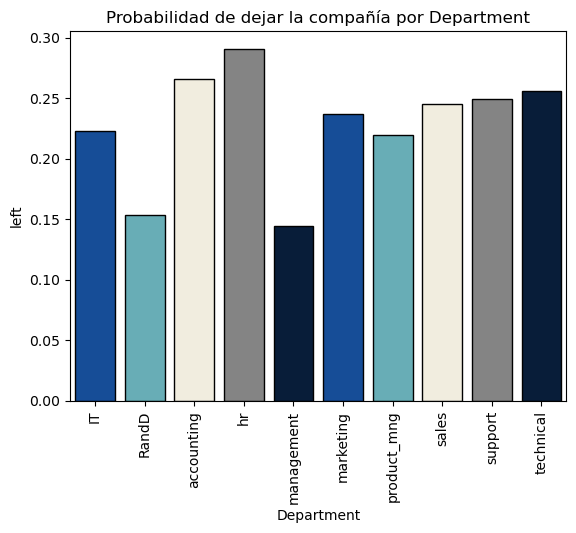

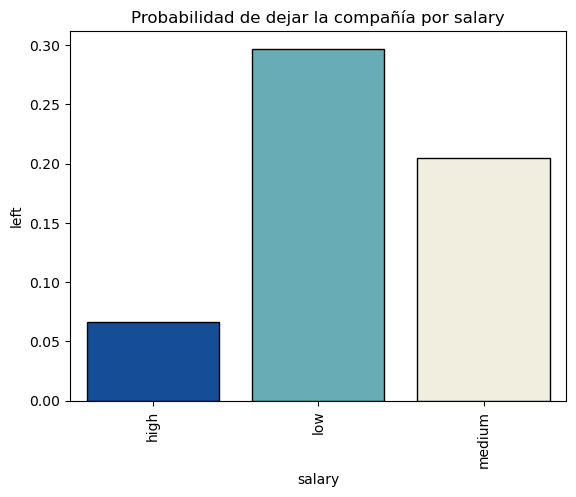

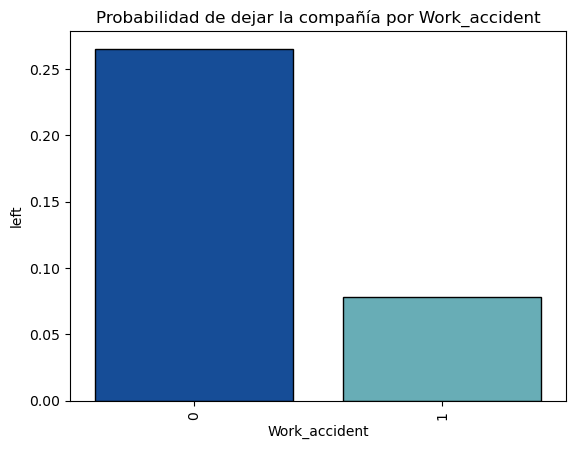

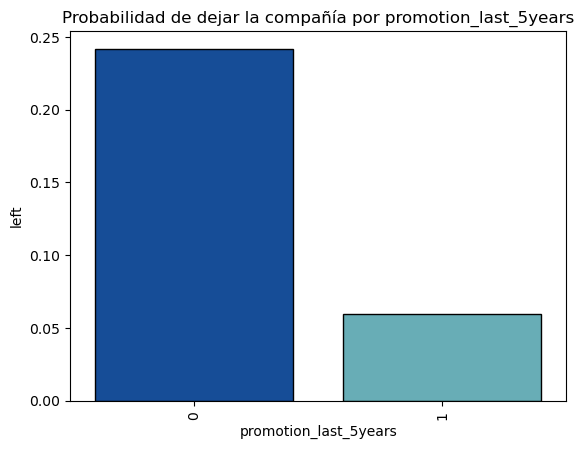

In [75]:
for var in variables:
    sns.barplot(
        data = df,
        x = var,
        y = 'left',
        estimator = 'mean', 
        errorbar = None,
        **kwargs
    )
    plt.title(f'Probabilidad de dejar la compañía por {var}')
    rot_show()

In [25]:
df_ = (
    df
    .groupby('promotion_last_5years')
    ['left']
    .mean()
)
df_[0] / df_[1]

4.062412161193174

## Correlación de las evaluaciones

In [26]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary', 'delta'],
      dtype='object')

In [27]:
dep_vars = ['satisfaction_level','last_evaluation','delta']

<Axes: xlabel='feature'>

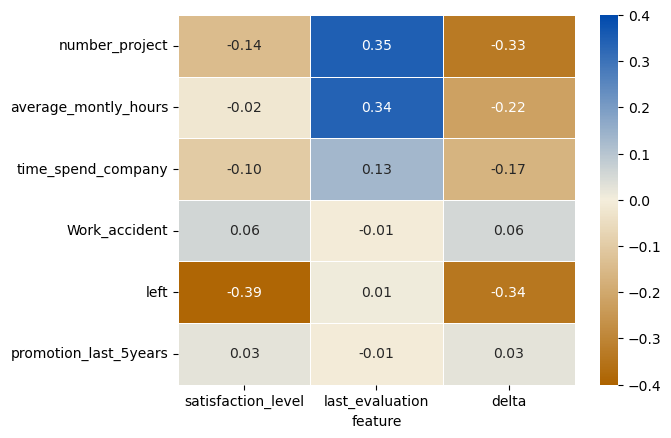

In [28]:
corr = (
    df
    .select_dtypes('number')
    .corr()
    .reset_index(names='feature')
    .query('feature.isin(@dep_vars)')
    .drop(columns=dep_vars)
    .set_index('feature')
    .transpose()
)

sns.heatmap(
    data = corr,
    annot = True,
    fmt='.2f',
    linewidths = .5,
    cmap = cmap,
    vmax = .4,
    vmin = -.4
)

### Número de proyectos

In [29]:
cat_vars = df.select_dtypes('category').columns

In [30]:
cat_vars

Index(['Department', 'salary'], dtype='object')

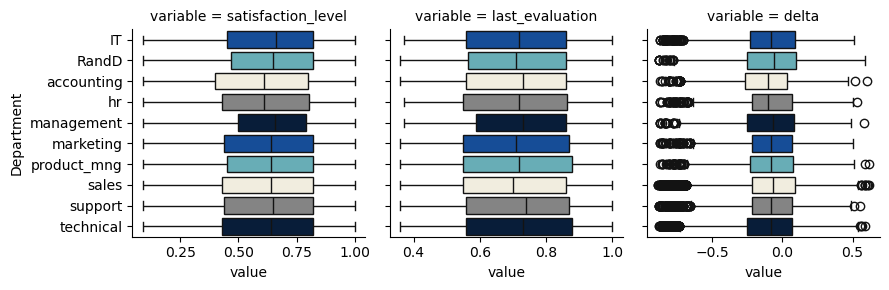

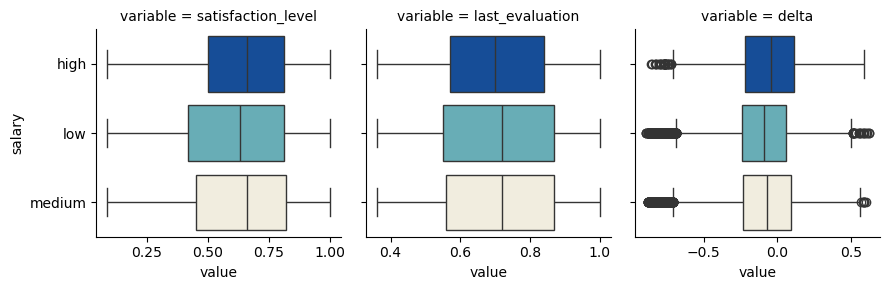

In [31]:
for var in cat_vars:
    df_ = (
        df
        [dep_vars + [var]]
        .melt(var)
    )
    grid = sns.FacetGrid(df_,col='variable',sharex=False)
    grid.map(sns.boxplot,'value',var,palette=palette)